# Human activity prediction


#### Human Activity Recognition Dataset
This data set is collected from recordings of 30 human subjects captured via smartphones enabled with embedded inertial sensors. 

Problem: Predict the activity category of a human from the recorded data.

Video of how the data was originally gathered: https://youtu.be/XOEN9W05_4A?t=10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn import model_selection

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Importing data that will be used to train machine learning algorithms
# This data shows recorded coordinates from smartphone. Each set of coordinates corresponds to a specific activity
X_train = pd.read_csv(r'Train\X_train.txt', sep=" ", header=None, encoding='utf-8')
X_train[:5]

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [3]:
print(X_train.shape)

(7767, 561)


In [5]:
# Importing list of column titles to get a better understanding of the coordinates
names = []
with open(r'features.txt', encoding='utf-8') as inputfile:
    for line in inputfile:
        names.append(line.strip().split(','))
names = [names[x][0] for x in range(0, len(names))]
names[:20]

['tBodyAcc-Mean-1',
 'tBodyAcc-Mean-2',
 'tBodyAcc-Mean-3',
 'tBodyAcc-STD-1',
 'tBodyAcc-STD-2',
 'tBodyAcc-STD-3',
 'tBodyAcc-Mad-1',
 'tBodyAcc-Mad-2',
 'tBodyAcc-Mad-3',
 'tBodyAcc-Max-1',
 'tBodyAcc-Max-2',
 'tBodyAcc-Max-3',
 'tBodyAcc-Min-1',
 'tBodyAcc-Min-2',
 'tBodyAcc-Min-3',
 'tBodyAcc-SMA-1',
 'tBodyAcc-Energy-1',
 'tBodyAcc-Energy-2',
 'tBodyAcc-Energy-3',
 'tBodyAcc-IQR-1']

In [6]:
# The column names are not significant and there are duplicates
# Column names don't help to understand the data better so I will leave the columns numbered without names

set([x for x in names if names.count(x) > 1])

{'fBodyAcc-Kurtosis-1',
 'fBodyAcc-Skewness-1',
 'fBodyAcc-ropy-1',
 'fBodyAccJerk-Kurtosis-1',
 'fBodyAccJerk-Skewness-1',
 'fBodyAccJerk-ropy-1',
 'fBodyGyro-Kurtosis-1',
 'fBodyGyro-Skewness-1',
 'fBodyGyro-ropy-1',
 'tBodyAcc-ropy-1',
 'tBodyAccJerk-ropy-1',
 'tBodyGyro-ropy-1',
 'tBodyGyroJerk-ropy-1',
 'tGravityAcc-ropy-1'}

In [7]:
# Importing data of activities that correspond to each row of previously imported coordinates

Y_train = pd.read_csv(r'Train\y_train.txt', sep=" ", names = "c", encoding='utf-8')
Y_train = Y_train.c
Y_train[:15]

0     5
1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
11    5
12    5
13    5
14    7
Name: c, dtype: int64

In [8]:
# Importing list of activity names that will be necessary when analysing the results
target_names = []
with open(r'activity_labels.txt', encoding='utf-8') as inputfile:
    for line in inputfile:
        target_names.append(line.strip().split(','))
target_names = [target_names[x][0] for x in range(0, len(target_names))]
target_names

['1 WALKING',
 '2 WALKING_UPSTAIRS',
 '3 WALKING_DOWNSTAIRS',
 '4 SITTING',
 '5 STANDING',
 '6 LAYING',
 '7 STAND_TO_SIT',
 '8 SIT_TO_STAND',
 '9 SIT_TO_LIE',
 '10 LIE_TO_SIT',
 '11 STAND_TO_LIE',
 '12 LIE_TO_STAND']

In [9]:
# Importing testing data that will be used to test the result of each machine learning algorithm

X_test = pd.read_csv(r'Test\X_test.txt', sep=" ", header=None, encoding='utf-8')
X_test[:5]

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849


In [10]:
print(X_test.shape)

(3162, 561)


In [11]:
# Importing more test data

Y_test = pd.read_csv(r'Test\y_test.txt', sep=" ", names = "c", encoding='utf-8')
Y_test = Y_test.c
Y_test[:17]

0     5
1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    7
Name: c, dtype: int64

In [12]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_train, Y_train, test_size=0.2, random_state=7)

In [13]:
scoring = 'accuracy'

##### Choosing which algorithms to check from scikit cheat sheet: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
##### LinearSVC seems to be the most appropriate algorithm but I will compare it to Kneighbors Classifier, SVC and Ensemble Classifier.

In [14]:
# Spot Checking the accuracy of each algorithm
models = []
models.append(('LSVC', LinearSVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('EC', BaggingClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LSVC: 0.976018 (0.005407)
KNN: 0.950748 (0.005545)
SVM: 0.921936 (0.010471)
EC: 0.949945 (0.008272)


In [15]:
# Evaluating Linear SVC on test data to make sure it doesn't overfit
LSVC=LinearSVC()
LSVC.fit(X_train, Y_train)
y_pred = LSVC.predict(X_test)
print("{0} / {1} correct".format(np.sum(Y_test == y_pred), len(Y_test)))
print(LSVC.score(X_test, Y_test))

2992 / 3162 correct
0.946236559139785


                      precision    recall  f1-score   support

           1 WALKING     0.9394    1.0000    0.9688       496
  2 WALKING_UPSTAIRS     0.9758    0.9406    0.9578       471
3 WALKING_DOWNSTAIRS     1.0000    0.9738    0.9867       420
           4 SITTING     0.9693    0.8701    0.9170       508
          5 STANDING     0.8962    0.9784    0.9355       556
            6 LAYING     0.9963    1.0000    0.9982       545
      7 STAND_TO_SIT     0.6957    0.6957    0.6957        23
      8 SIT_TO_STAND     0.9091    1.0000    0.9524        10
        9 SIT_TO_LIE     0.6471    0.6875    0.6667        32
       10 LIE_TO_SIT     0.7083    0.6800    0.6939        25
     11 STAND_TO_LIE     0.7045    0.6327    0.6667        49
     12 LIE_TO_STAND     0.6800    0.6296    0.6538        27

         avg / total     0.9474    0.9462    0.9458      3162



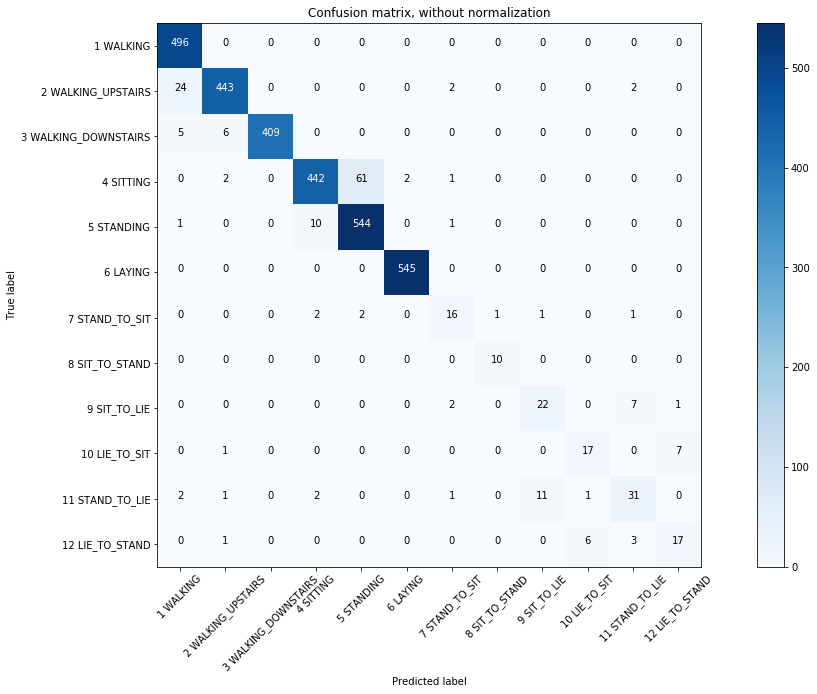

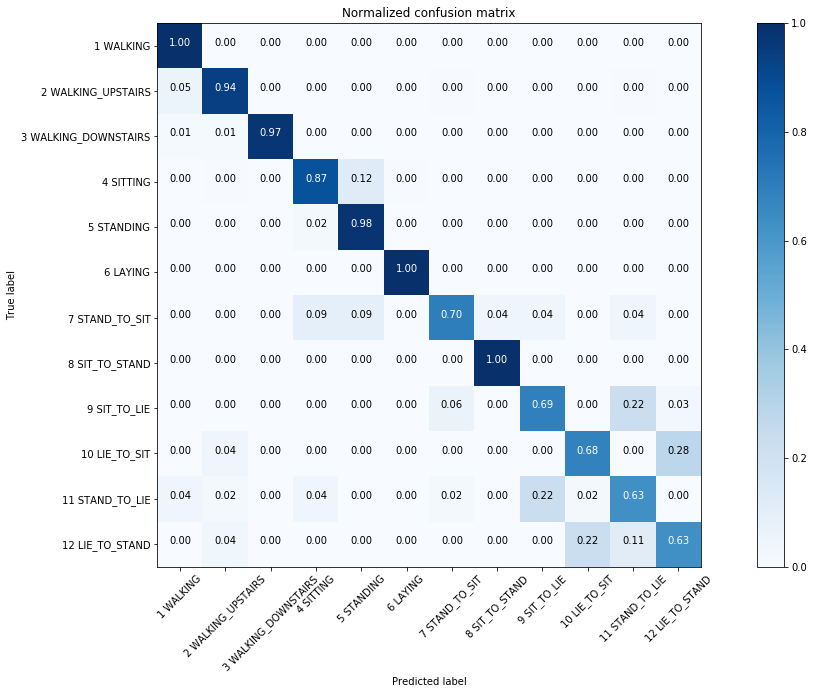

In [16]:
print(classification_report(Y_test, y_pred, target_names=target_names, sample_weight=None, digits=4))

class_names = target_names
def plot_confusion_matrix(cm, classes, figsize=None,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

#   plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(20, 10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(20, 10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Conclusion and analysis

From the resulting tables and graphs we can see that the first six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) can be predicted with a very high precision, ranging from 88% to 100%. 

The last six activities (STAND_TO_SIT, SIT_TO_STAND, SIT_TO_LIE,  LIE_TO_SIT, STAND_TO_LIE,  LIE_TO_STAND) with the exception of SIT_TO_STAND are predicted imprecisely. They are mostly confused with eachother. The main reason for this imprecision is probably the lack of data. As can be seen in the classificatoin report, there are 420-556 instances for each of the first six activities but only 10-49 instances for each of the last six activites.

From the first six activities, the most imprecise one is sitting. In 10% of cases, it is confused with standing and in 1% cases it is confused with laying. Standing on the other hand is confused with sitting only in 3% of cases and laying is 100% correctly predicted. The second most imprecise of the top six activities is walking downstaris, which is confused with walking in 5% of cases.

This project was successful and we can see that with enough supporting data, we can determine an activity recorded by a smartphone. The next step to further this project would be to gather more instances on the last six activities and adjust the machine learning model based on the results of the confusion matrix.